# Assignment # 1
# Muhammad Shafeen
# 22P-9278
# BS-AI-4A

## IMPORTING LIBRARIES AND IMPORTING DATASET

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import random
path="/home/shafeenkhan/Documents/My-all-programs--/Semester-4/Aritificial Intelligence/Lab-Assignments/Assignment 01/total_data_na.csv"
df=pd.read_csv(path)
df

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.00,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.00,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.00,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.00,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Siddarth Kaul,0,0,0,0,0,0,0,0.00,0,...,66.0,547,21,0,26.04,8.28,18.85,0,0,0
139,Trent Boult,0,0,0,0,0,0,0,0.00,0,...,52.4,466,18,0,25.88,8.84,17.55,0,0,0
140,Umesh Yadav,0,0,0,0,0,0,0,0.00,0,...,53.1,418,20,0,20.9,7.86,15.95,0,0,0
141,Vi0y Kumar,0,0,0,0,0,0,0,0.00,0,...,3.5,65,2,0,32.5,16.95,11.5,0,0,0


## CLEANING OF DATA

In [2]:
df=df.replace("-",value=None)
# df.info()
df.isnull().sum()
df=df.ffill()
df.isnull().sum()
# df.describe()

PLAYER    0
Mat.x     0
Inns.x    0
NO        0
Runs.x    0
HS        0
Avg.x     0
BF        0
SR.x      0
X100      0
X50       0
X4s       0
X6s       0
Mat.y     0
Inns.y    0
Ov        0
Runs.y    0
Wkts      0
BBI       0
Avg.y     0
Econ      0
SR.y      0
X4w       0
X5w       0
y         0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  143 non-null    object 
 1   Mat.x   143 non-null    int64  
 2   Inns.x  143 non-null    int64  
 3   NO      143 non-null    int64  
 4   Runs.x  143 non-null    int64  
 5   HS      143 non-null    int64  
 6   Avg.x   143 non-null    object 
 7   BF      143 non-null    int64  
 8   SR.x    143 non-null    float64
 9   X100    143 non-null    int64  
 10  X50     143 non-null    int64  
 11  X4s     143 non-null    int64  
 12  X6s     143 non-null    int64  
 13  Mat.y   143 non-null    int64  
 14  Inns.y  143 non-null    int64  
 15  Ov      143 non-null    float64
 16  Runs.y  143 non-null    int64  
 17  Wkts    143 non-null    int64  
 18  BBI     143 non-null    int64  
 19  Avg.y   143 non-null    object 
 20  Econ    143 non-null    float64
 21  SR.y    143 non-null    object 
 22  X4

## Changing some strings to correct form for processing

In [4]:
# def preprocess_column(column):
#     # Remove non-numeric characters using regular expression
#     column = column.str.replace(r'[^0-9.]', '')
#     # Convert data type to float
#     column = pd.to_numeric(column, errors='coerce')  # Set errors='coerce' to handle non-numeric values
#     return column


In [5]:
df2=df
encoder=LabelEncoder()
df2["Encoded_Names"] = encoder.fit_transform(df["PLAYER"])
# df2['SR.x'] = preprocess_column(df['SR.x'])
df2=df2.drop(columns="PLAYER")
scalar=StandardScaler()
df2.isnull().count()
df2=df2.ffill()
df3=scalar.fit_transform(df2)
df3

array([[ 0.4480029 ,  0.54491687, -0.1550601 , ..., -0.08391814,
         0.        , -1.69575554],
       [ 0.77823185,  0.90989631,  0.46087308, ..., -0.08391814,
         0.        , -1.71998062],
       [-0.7077984 , -0.55002147,  0.46087308, ..., -0.08391814,
         0.        , -1.67153046],
       ...,
       [-1.20314182, -1.09749065, -0.77099328, ..., -0.08391814,
         0.        ,  1.52617999],
       [-1.20314182, -1.09749065, -0.77099328, ..., -0.08391814,
         0.        ,  1.55040507],
       [-1.20314182, -1.09749065, -0.77099328, ..., -0.08391814,
         0.        ,  1.71998062]])

# Using the elbow method to find the optimal number of clusters

/home/shafeenkhan/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shafeenkhan/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shafeenkhan/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shafeenkhan/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

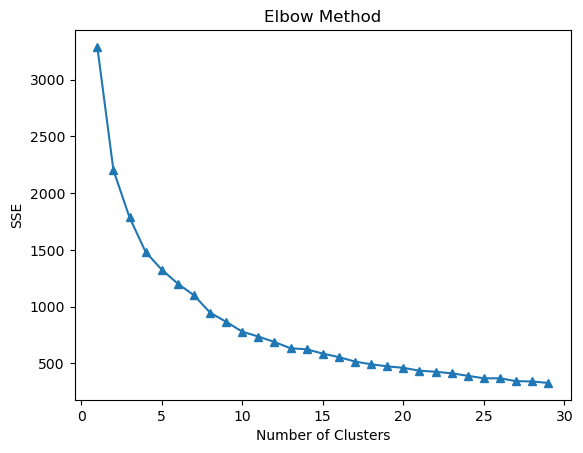

In [6]:
sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=0)
    kmeans.fit(df3)
    sse.append(kmeans.inertia_)
number_clusters = range(1,30)
plt.plot(number_clusters, sse,marker='^')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# For producing same output 


In [7]:
# random.seed(0)

## Training the model

In [8]:
# Specifying the number of clusters
kmeans = KMeans(n_clusters=4,n_init=10)

# Fitting the model to the data
kmeans.fit(df3)

# Getting the centroids of the clusters
centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)

# Getting the labels assigned to each data point
labels = kmeans.labels_
print("\nLabels:")
print(labels)

Centroids:
[[ 0.74520895  0.28943125  0.70724635 -0.18042022 -0.02814714  0.16504867
  -0.20284124  0.6811329  -0.1600461  -0.37072247 -0.24053846 -0.07644879
   1.10128297  1.13766871  1.03463696  1.06000072  0.8634537   0.
   0.84420962  0.54743386  0.93022288  0.28232174 -0.08391814  0.
   0.01938006]
 [ 1.19101803  1.52833371  0.76883966  2.19553619  1.74775573  1.62169836
   2.1517139   0.79446991  1.11143125  2.24440733  2.161443    2.04608236
  -0.84932541 -0.81886648 -0.77272992 -0.80513778 -0.7294968   0.
  -0.92167035 -1.21386229 -0.97150119 -0.18172434 -0.08391814  0.
   0.13862129]
 [-1.137784   -1.03666074 -0.71966551 -0.74482345 -0.99425489 -0.98810459
  -0.77297385 -1.24193251 -0.1600461  -0.489542   -0.67971863 -0.68553534
   0.08077091  0.18885855  0.23041122  0.25590873  0.28226935  0.
   0.49694073  0.74666516  0.46034605  0.02129582  0.16608798  0.
  -0.10648941]
 [ 0.16888082  0.28856226 -0.0963998   0.06063291  0.41070909  0.29670824
   0.13026995  0.51125359 -0.1

## ASSIGNING LABELS TO THE PLAYRS

In [9]:
df_new=df
df_new["Labels"]=kmeans.labels_
df_new

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y,Encoded_Names,Labels
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0,0,0,0.00,0,0,0,0,1,3
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0,0,0,0.00,0,0,0,0,0,1
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0,0,0,0.00,0,0,0,0,2,3
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0,0,0,0.00,0,0,0,0,3,3
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0,0,0,0.00,0,0,0,0,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Siddarth Kaul,0,0,0,0,0,0,0,0.00,0,...,21,0,26.04,8.28,18.85,0,0,0,126,2
139,Trent Boult,0,0,0,0,0,0,0,0.00,0,...,18,0,25.88,8.84,17.55,0,0,0,133,2
140,Umesh Yadav,0,0,0,0,0,0,0,0.00,0,...,20,0,20.9,7.86,15.95,0,0,0,134,2
141,Vi0y Kumar,0,0,0,0,0,0,0,0.00,0,...,2,0,32.5,16.95,11.5,0,0,0,135,2


## PLOTTING THE CLUSTERS 

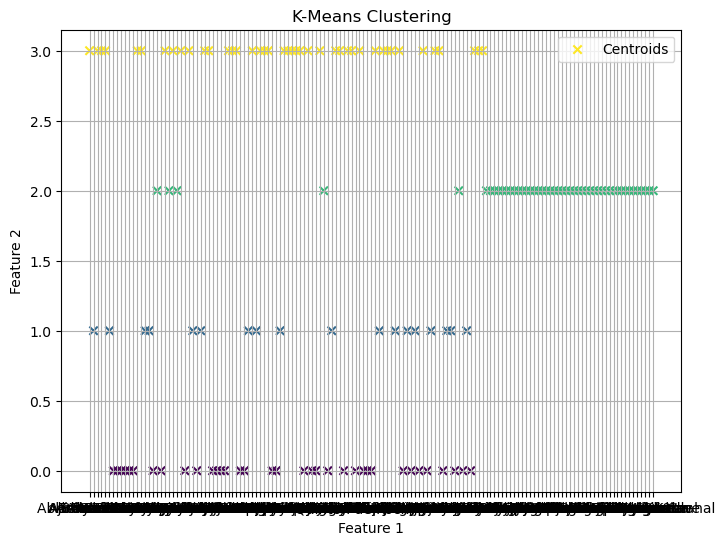

In [10]:
# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of data points colored by labels
plt.scatter(df["PLAYER"],labels ,c=labels , marker='x', label='Centroids')
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', edgecolor='black', s=100)  # Ensure markers are visible

# plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', marker='x', label='Centroids')
# plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', marker='o', edgecolor='black', s=100)  # Ensure markers are visible
# 
# plt.scatter(centroids[:, 0], centroids[:, 1], c='green', marker='x', label='Centroids')
# plt.scatter(centroids[:, 0], centroids[:, 1], c='green', marker='o', edgecolor='black', s=100)  # Ensure markers are visible

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')

plt.legend()
plt.grid(True)
plt.show()


## PREDICTING THE PLAYERS

## Top players of the league

In [11]:
top_order = df_new[df_new['Labels'] == 3].nlargest(3, ['Runs.x', 'SR.x'])
# top_order
middle_order=df_new[df_new['Labels'] == 0].nlargest(2, ['Runs.x', 'SR.x'])
# middle_order
all_rounders2=df_new[df_new['Labels'] == 2].nlargest(3, ['Runs.x', 'SR.x','Wkts'])
# all_rounders2
bowlers2=df_new[df_new['Labels'] == 1].nlargest(4, ['Wkts'])
# bowlers2

In [12]:
# print("Best Openers : ",top_order)
# print("Best Middle-players : ",middle_order)
# print("Best all rounders : ",all_rounders2)
# print("Best Bowlers : ",bowlers2)
total_best = pd.concat([top_order, middle_order, all_rounders2, bowlers2], ignore_index=False)
total_best.sort_values(["Runs.x"])


,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y,Encoded_Names,Labels
59,Mohammad 0bi,2,2,0,18,14,9,12,150.00,0,...,1,0,47,9.40,30,0,0,0,87,2
93,Tom Curran,5,4,1,23,18,7.66,28,82.14,0,...,6,0,19.66,11.60,10.16,0,0,0,132,2
22,Dan Christian,4,3,1,26,13,13,33,78.78,0,...,4,0,25.25,8.53,17.75,0,0,0,33,2
62,Nitish Ra0,15,15,2,304,59,23.38,232,131.03,0,...,4,0,11,7.13,9.25,0,0,0,94,3
6,Andre Russell,16,14,3,316,88,28.72,171,184.79,0,...,13,0,27.3,9.38,17.46,0,0,0,8,0
74,Robin Uthappa,16,16,0,351,54,21.93,265,132.45,0,...,0,0,0,0.00,0,0,0,0,109,3
89,Sunil 0rine,16,16,0,357,75,22.31,188,189.89,0,...,17,0,27.47,7.65,21.52,0,0,0,128,0
14,Chris Gayle,11,11,2,368,104,40.88,252,146.03,1,...,0,0,0,0.00,0,0,0,0,24,1
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0,0,0,0.00,0,0,0,0,3,3
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0,0,0,0.00,0,0,0,0,0,1


## 12-Players Balanced Team

In [13]:
top_order_batsmen = []
middle_order_batsmen = []
all_rounders = []
bowlers = []
for i, player in enumerate(df_new['PLAYER']):
    if df_new["Labels"][i] == 3:
#        print([player])
        top_order_batsmen.append(player)
    elif df_new["Labels"][i]== 0:
        middle_order_batsmen.append(player)
    elif df_new["Labels"][i]== 2:
        all_rounders.append(player)
    elif df_new["Labels"][i]==1:
        bowlers.append(player)
total_players=(top_order_batsmen[:3])+(middle_order_batsmen[:3])+(all_rounders[:2])+(bowlers[:4])
df_total=pd.DataFrame(total_players,columns=["Players"],index=[1,2,3,4,5,6,7,8,9,10,11,12])
print("Top Order Batsmen:", top_order_batsmen[:3])
print("Middle Order Batsmen:", middle_order_batsmen[:3])
print("All-rounders:", all_rounders[:2])
print("Bowlers:", bowlers[:4])
df_total

Top Order Batsmen: ['Aaron Finch', 'Abhishek Sharma', 'Ajinkya Rahane']
Middle Order Batsmen: ['Andre Russell', 'Andrew Tye', 'Axar Patel']
All-rounders: ['Chris Woakes', 'Corey Anderson']
Bowlers: ['AB de Villiers', 'Ambati Rayudu', 'Chris Gayle', 'Chris Lynn']


,Players
1,Aaron Finch
2,Abhishek Sharma
3,Ajinkya Rahane
4,Andre Russell
5,Andrew Tye
6,Axar Patel
7,Chris Woakes
8,Corey Anderson
9,AB de Villiers
10,Ambati Rayudu
